In [5]:
%matplotlib inline
import numpy
import scipy.special
import glob
import imageio
import cv2
import os
import random
import pickle
import matplotlib.pyplot as plt

In [6]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #number of input nodes
        self.input_nodes = inputnodes
        #number of hidden nodes
        self.hidden_nodes = hiddennodes
        #number of output nodes
        self.output_nodes = outputnodes
        #learning rate
        self.lr = learningrate
        
        
        #random weight of links between input and hidden layer (in range of -0.5 to +0.5)
        self.weight_input_hidden = (numpy.random.rand(self.hidden_nodes, self.input_nodes) - 0.5)
        #random weight of links between hidden and output layer (in range of -0.5 to +0.5)
        self.weight_hidden_output = (numpy.random.rand(self.output_nodes, self.hidden_nodes) - 0.5)
        
        
        #sigmoid function
        #def relu(x):
   # return max(0, x)
        #self.activation_function = lambda x: scipy.special.expit(x) 
        
    def activation_function(self,x):
        return 1 / (1 + numpy.e ** -x)
    
    def train(self, inputs_list, targets_list):
        
        #convert inputs and targets list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #inputs to hidden layer
        hidden_inputs = numpy.dot(self.weight_input_hidden, inputs)
        #outputs from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #inputs to output layer
        final_inputs = numpy.dot(self.weight_hidden_output, hidden_outputs)
        #outputs from output layer
        final_outputs = self.activation_function(final_inputs)
        
        #error between target value and observed value of the output layer
        output_errors = targets - final_outputs
        
        #error for the hidden layer via backpropagation
        hidden_errors = numpy.dot(self.weight_hidden_output.T, output_errors)
        
        #gradient descent to update the weights
        #update the weights of the links between hidden and output layer
        self.weight_hidden_output += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #update the weights of the links between the input and hidden layer
        self.weight_input_hidden += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
    def predict(self, inputs_list):
        
        #convert input list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #inputs to hidden layer
        hidden_inputs = numpy.dot(self.weight_input_hidden, inputs)
        
        #outputs from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #inputs to output layer
        final_inputs = numpy.dot(self.weight_hidden_output, hidden_outputs)
        
        #outputs from the output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    def numbers_to_strings(self,argument):
        return { 
            0: "क", 
            1: "ख", 
            2: "ग",
            3: "घ",
            4: "ङ ",
            5: "च ",
            6: "छ ",
            7: "ज ",
            8: "झ ",
            9: "ञ",
            10: "ट",
            11: "ठ",
            12: "ड",
            13: "ढ",
            14: "ण",
            15: "त",
            16: "थ",
            17: "द",
            18: "ध",
            19: "न",
            20: "प",
            21: "फ",
            22:"ब",
            23: "भ",
            24:"म",
            25:"य",
            26:"र",
            27:"ल",
            28:"व",
            29:" श",
            30: "ष",
            31: "स",
            32:"ह",
            33:"क्ष",
            34:"त्र",
            35:"ज्ञ",
        }[argument]


In [7]:
input_nodes = 1024 
hidden_nodes = 340
output_nodes = 36
learning_rate = 0.1

In [8]:
#load the save model
saveneural=pickle.load(file=open("saveneuralnetworkobj.pkl","rb"))

In [9]:
#give appropriate test.csv file path
test_data = open("C:\\Users\\princ\\Desktop\\Nepali Handwriting Recognization\\Dataset_csv\\Consonants\\test.csv", 'r')
test_list = test_data.readlines()
test_data.close()
print(len(test_list))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\princ\\Desktop\\Nepali Handwriting Recognization\\Dataset_csv\\Consonants\\test.csv'

In [10]:
#console view 
Correct_Character=[];
Wrong_Character=[];
allletter=[]
scores = []
correct_character=[]
wrong_character=[]
for record in test_list:
    all_values = record.split(',')
    
    #the first value is the label
    correct_label = int(all_values[0])
    allletter.append(correct_label)
    #all the others are the pixels (i.e inputs)
    inputs = (numpy.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    
    #use the trained network to predict the output based on the given input
    outputs = saveneural.predict(inputs)
    
    #the index of the highest value in output is the predicted label
    label = numpy.argmax(outputs)
    
    
    #if the correct label, and the predicted label are same
    if (label == correct_label):
        #append 1 to scores.
        scores.append(1)
        correct_character.append(correct_label)
       
    else:
        #otherwise, wrong prediction, append 0 to scores.
        scores.append(0)
        wrong_character.append(correct_label)
       
        pass
    pass
x = numpy.array(allletter) 
print(numpy.unique(x)) 
print("==========Correct Detection================")
for n in range(output_nodes):
    count =correct_character.count(n)
    print("=========================================")
    
    print(saveneural.numbers_to_strings(n)+"==>" + str(count) )
    Correct_Character.append(count)
    pass
print("==========Wrong Detection==================")
for n in range(output_nodes):
    count =wrong_character.count(n)
    print("=========================================")

    print(saveneural.numbers_to_strings(n)+"==>" + str(count))
    Wrong_Character.append(count)
    pass

scores_array = numpy.asarray(scores)
print ("Accuracy = ", (scores_array.sum() / scores_array.size) * 100, "%")
print(Correct_Character)
print(Wrong_Character)

NameError: name 'test_list' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape

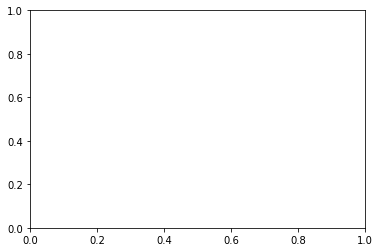

In [11]:
# data to plot
n_groups = 36
correct_prediction = (Correct_Character)
wrong_prediction = (Wrong_Character)

# create plot
fig, ax = plt.subplots()
index = numpy.arange(n_groups)
bar_width = 0.5
opacity = 0.8

rects1 = plt.bar(index, correct_prediction, bar_width,
alpha=opacity,
color='b',
label='Correct')

rects2 = plt.bar(index + bar_width, wrong_prediction, bar_width,
alpha=opacity,
color='g',
label='Wrong')

plt.xlabel('Character')
plt.ylabel('Scores')
plt.title('Scores by Character')
plt.xticks(index + bar_width, ("क" ,"ख", "ग" ,"घ" ,"ङ" ,"च" ,"छ" ,"ज", "झ", "ज","ट" ,"ठ" ,"ड" ,"ढ", "ण", "त" ,"थ" ,"द" ,"ध" ,"न" ,"प" ,"फ" ,"ब", "भ", "म", "य" ,"र" ,"ल", "व", "श" ,"ष" ,"स" ,"ह" ,"क्ष" ,"त्र" ,"ज्ञ"))
plt.legend()
plt.tight_layout()
plt.savefig('fig1.png', dpi = 300)
plt.show()
